In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import json
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

## Load Dataset
Downloaded raw dataset file from https://github.com/KaiDMML/FakeNewsNet and store on **22FEB_fakenewsnet_dataset.zip** and **tweets_zip**

"x" - represents either **Poltifact** (pf) or **Gossipcop** (gc)
- **x_tweets.json** -> raw collated tweets metadata 
- **x_tweets_cleaned_sa_data.json** -> clean tweets + SA + relevant metadata
- **x.json** -> raw news article metdata
- **x_clean.json** -> clean title/articles + relevent metadata
- **x_combined.json** -> clean title/articles + relevent metadata + tweets metadata


In [ ]:
os.listdir("gdrive/MyDrive/BT4222/Data")

['22FEB_fakenewsnet_dataset.zip',
 'politifact.json',
 'gossipcop.json',
 'politifact_clean.json',
 'gossipcop_clean.json',
 'tweets_zip',
 'tweets',
 'politifact_tweets.json',
 'gossipcop_tweets.json',
 'politifact_tweets_cleaned_sa_data.json',
 'gossipcop_tweets_cleaned_sa_data.json',
 'politifact_combined.json',
 'gossipcop_combined.json']

# Pre-processing steps

## (1) Getting raw data from FakeNewNet

Filtering of non-relevant metadata from all news article and tweets are done on **clean_articles.ipynb** and **clean_tweets.ipynb**. <br>
The output are stored in **x.json** and **x_tweets.json**

## (2) Raw data EDA
- Shape of dataset
- Columns and Data types
- Check NaN values
- Check target labels 

In [ ]:
def check_NaNs(df):
  columns = list(df.columns.sort_values())
  for x in columns:
    print(f"{x}: {df[x].isnull().values.any()}")

### 2.1 EDA on title and text

In [ ]:
pf_raw = json.load(open("gdrive/MyDrive/BT4222/Data/politifact.json", "r"))
gc_raw = json.load(open("gdrive/MyDrive/BT4222/Data/gossipcop.json", "r"))

pf_raw_df = pd.DataFrame(pf_raw)
gc_raw_df = pd.DataFrame(gc_raw)

In [ ]:
pf_raw_df.shape, gc_raw_df.shape

((954, 10), (20049, 10))

In [ ]:
pf_raw_df.head(5)

id                                               text  \
0  politifact13600  WE WILL RIOT! Michelle Obama’s Mom Will Receiv...   
1  politifact14384  Representative Bob Goodlatte will miss out on ...   
2  politifact14643  SHARE this story with your friends!\n\n4.8k SH...   
3  politifact14116  Chris Chase, USA TODAY Sports\n\nLance Armstro...   
4  politifact13698  A longtime push to honor modern presidents on ...   

                                               title  publish_date  \
0  WE WILL RIOT! Michelle Obama’s Mom Will Receiv...           NaN   
1  Peter Strzok, FBI Agent in Texting Scandal, Wi...  1.529313e+09   
2  San Juan City Council Votes Unanimously To Imp...  1.507850e+09   
3  Lance Armstrong's defiant Twitter photo shows ...  1.352650e+09   
4  Barrack Obama Will Be On New $1 Dollar Bill 20...           NaN   

                    source                                                url  \
0  https://web.archive.org  https://web.archive.org/web/20161227034716/htt...   
1         http://nymag.com  https://nymag.com/intelligencer/2018/06/fbi-ag...   
2  https://web.archive.org  https://web.archive.org/web/20171016054621/htt...   
3  http://www.usatoday.com  https://www.usatoday.com/story/gameon/2012/11/...   
4  https://web.archive.org  https://web.archive.org/web/20170201234728/htt...   

         publisher     dataset label                 published_time  
0          enhlive  politifact  fake                            NaN  
1    Intelligencer  politifact  fake  2018-06-18T05:04:37.365-04:00  
2  Daily Feed News  politifact  fake      2017-10-12T23:15:41+00:00  
3        USA TODAY  politifact  fake                            NaN  
4    TRUEAMERICANS  politifact  fake                            NaN

In [ ]:
pf_raw_df.dtypes

id                 object
text               object
title              object
publish_date      float64
source             object
url                object
publisher          object
dataset            object
label              object
published_time     object
dtype: object

In [ ]:
gc_raw_df.head(5)

id                                               text  \
0  gossipcop-5181890716  Three’s company! Jamie Foxx is jeopardizing hi...   
1  gossipcop-5005633749  The INSIDER Summary:\n\nKim Kardashian will re...   
2  gossipcop-2661113454  (CNN) -- It may be a case of wishful thinking,...   
3  gossipcop-9276096851  BRAD Pitt has vowed to stay celibate for a yea...   
4  gossipcop-8137449994  American actress\n\nLisa Valerie Kudrow[1] ( ;...   

                                               title  publish_date  \
0  Jamie Foxx's Ex Is Threatening His Relationshi...  1.519837e+09   
1  Kim Kardashian will not be attending Paris Fas...  1.506355e+09   
2         Is Kim Kardashian pursuing a music career?  1.403021e+09   
3  Brad Pitt vows a year of celibacy prompting he...  1.520629e+09   
4                                        Lisa Kudrow           NaN   

                           source  \
0    http://www.intouchweekly.com   
1  http://www.businessinsider.com   
2              http://www.cnn.com   
3         http://www.thesun.co.uk   
4         http://en.wikipedia.org   

                                                 url         publisher  \
0  https://www.intouchweekly.com/posts/jamie-foxx...   In Touch Weekly   
1  http://hollywoodlife.com/2017/09/26/kim-kardas...  Business Insider   
2  http://www.cnn.com/2014/06/18/showbiz/celebrit...               CNN   
3  https://www.thesun.co.uk/tvandshowbiz/5770099/...           The Sun   
4          https://en.wikipedia.org/wiki/Lisa_Kudrow               NaN   

              published_time    dataset label  
0  2018-02-28T17:00:00+00:00  gossipcop  fake  
1                        NaN  gossipcop  fake  
2                        NaN  gossipcop  fake  
3  2018-03-09T20:57:46+00:00  gossipcop  fake  
4                        NaN  gossipcop  fake

In [ ]:
gc_raw_df.dtypes

id                 object
text               object
title              object
publish_date      float64
source             object
url                object
publisher          object
published_time     object
dataset            object
label              object
dtype: object

In [ ]:
check_NaNs(pf_raw_df)

dataset: False
id: False
label: False
publish_date: True
published_time: True
publisher: True
source: False
text: False
title: False
url: False


In [ ]:
check_NaNs(gc_raw_df)

dataset: False
id: False
label: False
publish_date: True
published_time: True
publisher: True
source: False
text: False
title: False
url: False


In [ ]:
print("[Politifact]")
print(pf_raw_df.label.value_counts())
print("\n[Gossipcop]")
print(gc_raw_df.label.value_counts())

[Politifact]
real    553
fake    401
Name: label, dtype: int64

[Gossipcop]
real    15204
fake     4845
Name: label, dtype: int64


### 2.2 EDA on tweets

In [ ]:
pf_raw_tweets = json.load(open("gdrive/MyDrive/BT4222/Data/politifact_tweets.json", "r"))
gc_raw_tweets  = json.load(open("gdrive/MyDrive/BT4222/Data/gossipcop_tweets.json", "r"))

pf_raw_tweets_df = pd.DataFrame(pf_raw_tweets)
gc_raw_tweets_df = pd.DataFrame(gc_raw_tweets)

In [ ]:
pf_raw_tweets_df.shape, gc_raw_tweets_df.shape

((396306, 18), (1131724, 18))

In [ ]:
pf_raw_tweets_df.head()

dataset label       article_id  \
0  politifact  real   politifact3581   
1  politifact  real   politifact1467   
2  politifact  real  politifact13303   
3  politifact  real  politifact13303   
4  politifact  real  politifact13303   

                                                user  \
0  {'id': 5526202, 'name': 'Jonathan Torres', 'sc...   
1  {'id': 1046864876205834240, 'name': 'PUBLIUS',...   
2  {'id': 165298304, 'name': 'Servelan (fighting ...   
3  {'id': 27273651, 'name': 'Attribyte', 'screen_...   
4  {'id': 456140955, 'name': 'Experiencers United...   

                       created_at                   id  \
0  Wed Dec 30 23:10:25 +0000 2009           7212242669   
1  Tue Nov 06 06:33:16 +0000 2018  1059695192163250176   
2  Sat Jul 01 02:07:12 +0000 2017   880971017367179264   
3  Fri Oct 07 23:31:10 +0000 2016   784536576474943547   
4  Sun Oct 23 02:27:26 +0000 2016   790016755557072896   

                                           full_text  \
0  PolitiFact | Hannity says Obama won't even use...   
1  "H.R.1424 - A bill to provide authority for th...   
2  Joint DHS and ODNI Election Security Statement...   
3  Joint DHS and ODNI Election Security Statement...   
4  Joint DHS and ODNI Election Security Statement...   

                                              source   geo coordinates place  \
0  <a href="http://twitter.com" rel="nofollow">Tw...  None        None  None   
1  <a href="http://twitter.com" rel="nofollow">Tw...  None        None  None   
2  <a href="http://twitter.com" rel="nofollow">Tw...  None        None  None   
3  <a href="http://attribyte.com" rel="nofollow">...  None        None  None   
4  <a href="http://www.facebook.com/twitter" rel=...  None        None  None   

   retweet_count  favorite_count  favorited  retweeted possibly_sensitive  \
0              0               0      False      False               NULL   
1              0               0      False      False               NULL   
2              0               0      False      False              False   
3              0               0      False      False              False   
4              0               0      False      False              False   

  possibly_sensitive_appealable lang  
0                          NULL   en  
1                          NULL   en  
2                         False   en  
3                         False   en  
4                         False   en

In [ ]:
pf_raw_tweets_df.dtypes

dataset                          object
label                            object
article_id                       object
user                             object
created_at                       object
id                                int64
full_text                        object
source                           object
geo                              object
coordinates                      object
place                            object
retweet_count                     int64
favorite_count                    int64
favorited                          bool
retweeted                          bool
possibly_sensitive               object
possibly_sensitive_appealable    object
lang                             object
dtype: object

In [ ]:
gc_raw_tweets_df.head()

dataset label        article_id  \
0  gossipcop  real  gossipcop-949501   
1  gossipcop  real  gossipcop-949501   
2  gossipcop  real  gossipcop-949501   
3  gossipcop  real  gossipcop-949501   
4  gossipcop  real  gossipcop-949501   

                                                user  \
0  {'id': 844973417447112704, 'name': 'Rodney Rey...   
1  {'id': 2530389144, 'name': 'Wisma Berita', 'sc...   
2  {'id': 2530389144, 'name': 'Wisma Berita', 'sc...   
3  {'id': 844966877075927040, 'name': 'Ray Craig'...   
4  {'id': 806353338564345856, 'name': 'McDonald B...   

                       created_at                   id  \
0  Thu Jul 05 19:34:27 +0000 2018  1014955688844513286   
1  Thu Jul 05 23:58:16 +0000 2018  1015022079156998144   
2  Thu Jul 05 20:26:36 +0000 2018  1014968813383704577   
3  Thu Jul 05 19:34:34 +0000 2018  1014955715495104512   
4  Fri Jul 06 01:10:23 +0000 2018  1015040228371951618   

                                           full_text  \
0  Priyanka Chopra Spends the Fourth of July With...   
1  Priyanka Chopra Spends the Fourth of July With...   
2  Priyanka Chopra Spends the Fourth of July With...   
3  Priyanka Chopra Spends the Fourth of July With...   
4  Priyanka Chopra Spends the Fourth of July With...   

                                              source   geo coordinates place  \
0  <a href="https://ifttt.com" rel="nofollow">IFT...  None        None  None   
1  <a href="https://www.fraksigolkar.or.id/" rel=...  None        None  None   
2  <a href="https://www.fraksigolkar.or.id/" rel=...  None        None  None   
3  <a href="https://ifttt.com" rel="nofollow">IFT...  None        None  None   
4  <a href="http://www.facebook.com/twitter" rel=...  None        None  None   

   retweet_count  favorite_count  favorited  retweeted possibly_sensitive  \
0              0               1      False      False              False   
1              0               0      False      False              False   
2              0               0      False      False              False   
3              0               1      False      False              False   
4              1               2      False      False              False   

  possibly_sensitive_appealable lang  
0                         False   en  
1                         False   en  
2                         False   en  
3                         False   en  
4                         False   en

In [ ]:
gc_raw_tweets_df.dtypes

dataset                          object
label                            object
article_id                       object
user                             object
created_at                       object
id                                int64
full_text                        object
source                           object
geo                              object
coordinates                      object
place                            object
retweet_count                     int64
favorite_count                    int64
favorited                          bool
retweeted                          bool
possibly_sensitive               object
possibly_sensitive_appealable    object
lang                             object
dtype: object

In [ ]:
check_NaNs(pf_raw_tweets_df)

article_id: False
coordinates: True
created_at: False
dataset: False
favorite_count: False
favorited: False
full_text: False
geo: True
id: False
label: False
lang: False
place: True
possibly_sensitive: False
possibly_sensitive_appealable: False
retweet_count: False
retweeted: False
source: False
user: False


In [ ]:
check_NaNs(gc_raw_tweets_df)

article_id: False
coordinates: True
created_at: False
dataset: False
favorite_count: False
favorited: False
full_text: False
geo: True
id: False
label: False
lang: False
place: True
possibly_sensitive: False
possibly_sensitive_appealable: False
retweet_count: False
retweeted: False
source: False
user: False


In [ ]:
print("[Politifact Tweets]")
print(pf_raw_tweets_df.label.value_counts())
print("\n[Gossipcop Tweets]")
print(gc_raw_tweets_df.label.value_counts())

[Politifact Tweets]
real    284634
fake    111672
Name: label, dtype: int64

[Gossipcop Tweets]
real    707340
fake    424384
Name: label, dtype: int64


## (3) Clean text [title + article] for both dataset
- Remove tags 
- Expand contractions 
- Stopword removal 
- Remove punctuations 
- Lemmatization 
- Lowercase

Cleaning of text done on **clean_json.ipynb** file and output to **x_clean.json**

Added 2 new columns:
1. "text_clean": cleaned text after running pipeline
2. "title_clean": cleaned title after running pipeline
 


In [ ]:
pf_clean = json.load(open("gdrive/MyDrive/BT4222/Data/politifact_clean.json", "r"))
gc_clean = json.load(open("gdrive/MyDrive/BT4222/Data/gossipcop_clean.json", "r"))

pf_clean_df = pd.DataFrame(pf_clean)
gc_clean_df = pd.DataFrame(gc_clean)

In [ ]:
pf_clean_df.shape, gc_clean_df.shape

((954, 12), (20049, 12))

In [ ]:
pf_clean_df.dtypes

id                 object
text               object
title              object
publish_date      float64
source             object
url                object
publisher          object
dataset            object
label              object
title_clean        object
text_clean         object
published_time     object
dtype: object

In [ ]:
pf_raw_df['text'][0]

'WE WILL RIOT! Michelle Obama’s Mom Will Receive $160k Every Year Out Of Taxpayers’ Pockets!\n\nThis amount of corruption is a next level thing that we haven’t seen portrayed this nonchalantly before. Namely, Michelle Obama’s mom failed to earn a pension that’s three times the amount of an average American family’s whole income!\n\nIt appears to be that just as Barack, the rest of the Obama’s never intended on getting jobs as us, the regular folks, because they got the chance to live on the backs of honest and hard working Americans that pay taxes.\n\nCongress just announced the most stupid, unexplained and unethical waste of taxpayer money prepared by no other than Obama.\n\nFirst Grandma Marian Robinson, 79, will get a big fat check for a lifetime worth 160K government pension when she takes off the White House next year, as concluded by congressional budget statements.\n\nAs concluded in documents obtained through the Freedom of Information Act (FOIA), Mrs. Robinson got to be eligib

In [ ]:
pf_clean_df['text_clean'][0]

'riot michelle obama mom receive 160k year taxpayer pocket corruption level thing portray nonchalantly michelle obama mom fail earn pension time average american family income appear barack rest obama intend job regular folk chance live honest hard work americans pay taxis congress announce stupid unexplained unethical waste taxpayer money prepare obama grandma marian robinson 79 big fat check lifetime worth 160k government pension white house year conclude congressional budget statement conclude document obtain freedom information act foia mrs robinson eligible lifetime pension service render full-time in-home caregiver granddaughter malia 18 sasha 15 president obama year office michelle obama mom live better royalty white house privilege 160,000 year rest life granddaughter pathetic excuse tell thought comment section bellow'

In [ ]:
pf_raw_df['title'][0]

'WE WILL RIOT! Michelle Obama’s Mom Will Receive $160k Every Year Out Of Taxpayers’ Pockets!'

In [ ]:
pf_clean_df['title_clean'][0]

'riot michelle obama mom receive 160k year taxpayer pocket'

## (4) Clean text [tweets] for both dataset
- Remove URLs 
- Lowercase

Cleaning of text done and output to **x_tweets_cleaned_sa_data.json**

Added 1 new columns:
1. "full_text_clean": cleaned text after running pipeline


 



In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def clean_tweet(text):
    text = text.lower()
    text = remove_url(text)
    return text

## (5) Adding features: Sentiment Analysis on tweets
- Generating SA score 
- Generating SA labels
- Generating SA avg score: avg score = pos count/neg count


#### 5.1 Using Hugginface pre-trained model: sentiment-roberta-large-english
Sentiment analysis pipeline is done using codes below and output to **x_tweets_cleaned_sa_data.json**

1. "tweet_sa_label": cleaned title after running pipeline
2. "tweet_sa_score": cleaned title after running pipeline

In [ ]:
!pip install -q transformers

# Using pipeline class to make predictions from models available in the Hub in an easy way 
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model='siebert/sentiment-roberta-large-english')

sa_data = {} # store SA 

def generate_sentiment(tweets_df):
  tweet_text = tweets_df.full_text_clean.tolist()

  try:
    temp_sa = sentiment_pipeline(tweet_text)
  except Exception as e:
    print(f"An exception occurred " )
    if hasattr(e, 'message'):
      print(e.message)
    else:
      print(e)

  tweets_df['tweet_sa_label'] = [i['label'] for i in temp_sa]
  tweets_df['tweet_sa_score'] = [i['score'] for i in temp_sa]
  return tweets_df 

def convert_df_to_json_objects(tweet_df):
  tweet_sa_json = [ 
    dict([
        (colname, row[i]) 
        for i,colname in enumerate(tweet_df.columns)
    ])
    for row in tweet_df.values
  ]
  return tweet_sa_json

In [ ]:
pf_tweets_sa = json.load(open("gdrive/MyDrive/BT4222/Data/politifact_tweets_cleaned_sa_data.json", "r"))
gc_tweets_sa = json.load(open("gdrive/MyDrive/BT4222/Data/gossipcop_tweets_cleaned_sa_data.json", "r"))

pf_tweets_sa_df = pd.DataFrame(pf_tweets_sa)
gc_tweets_sa_df = pd.DataFrame(gc_tweets_sa)

In [ ]:
pf_tweets_sa_df.shape, gc_tweets_sa_df.shape

((396306, 21), (1131724, 21))

In [ ]:
pf_tweets_sa_df.dtypes

dataset                           object
label                             object
article_id                        object
user                              object
created_at                        object
id                                 int64
full_text                         object
source                            object
geo                               object
coordinates                       object
place                             object
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensitive                object
possibly_sensitive_appealable     object
lang                              object
full_text_clean                   object
tweet_sa_label                    object
tweet_sa_score                   float64
dtype: object

In [ ]:
# model split them into 2 classes only
set(x['tweet_sa_label'] for x in pf_tweets_sa)

{'NEGATIVE', 'POSITIVE'}

In [ ]:
# Get value range
max(x['tweet_sa_score'] for x in pf_tweets_sa),min(x['tweet_sa_score'] for x in pf_tweets_sa)

(0.9995145797729492, 0.500088632106781)

In [ ]:
real_list = list(filter(lambda x: x['label']=="real", pf_tweets_sa))
fake_list = list(filter(lambda x: x['label']=="fake", pf_tweets_sa))

In [ ]:
real_neg_list = list(filter(lambda x: x['tweet_sa_label']=="NEGATIVE", real_list))
real_pos_list = list(filter(lambda x: x['tweet_sa_label']=="POSITIVE", real_list))
fake_neg_list = list(filter(lambda x: x['tweet_sa_label']=="NEGATIVE", fake_list))
fake_pos_list = list(filter(lambda x: x['tweet_sa_label']=="POSITIVE", fake_list))

In [ ]:
len(real_neg_list),len(real_pos_list)

(131165, 153469)

In [ ]:
len(fake_neg_list),len(fake_pos_list)

(75566, 36106)

#### 5.2 Using VADER for Sentiment Analysis

In [94]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.3 MB/s 


In [95]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
txt = str(pf_tweets_sa_df['full_text_clean'][0])
score = analyser.polarity_scores(txt)
score

{'compound': -0.8591, 'neg': 0.459, 'neu': 0.541, 'pos': 0.0}

## (6) Adding features: Average Sentiment score
Calculation is done and output to **x_tweets_combined.json**

Added 1 new columns:
1. "full_text_clean": cleaned text after running pipeline



In [ ]:
def computeAvgSentiments(article_id, tweets_list):
  tweets = list(filter(lambda x: x['article_id'] == article_id, tweets_list))
  pos_count = len(list(filter(lambda x: x['tweet_sa_label'] == "NEGATIVE", tweets)))
  neg_count = len(list(filter(lambda x: x['tweet_sa_label'] == "POSITIVE", tweets)))
  avg_sentiment_score = pos_count / (neg_count+1)
  return avg_sentiment_score

## (7) Adding features: Mapping articles to concat tweets
Mapping of one article to all tweets are concat and output to **x_tweets_combined.json**

Added 1 new columns:
1. "tweets_text": concat tweets, removing duplicated title, sentences and URLs.
2. "tweets_len": Length of concat tweets after running through pipeline



In [ ]:
def get_article_length(article):
  return len(article.split(' '))

def concatTweets(article_df, article_id, tweets_list):
  title = article_df[article_df['id']== article_id].title.values[0]
  text = "" # remove tweets with title in text
  templist = [] # store common sentences
  tweets = list(filter(lambda x: x['article_id'] == article_id, tweets_list))
  for tweet in tweets: 
    #print("---------")
    #print(tweet['full_text'].lower())
    temp = remove_url(tweet['full_text'].lower().replace(title.lower(), ''))
    if temp != '' and temp not in templist:
      templist.append(temp)
      text = text + ". " + temp
  return text

def convert_df_to_json_objects(tweet_df):
  tweet_sa_json = [ 
    dict([
        (colname, row[i]) 
        for i,colname in enumerate(tweet_df.columns)
    ])
    for row in tweet_df.values
  ]
  return tweet_sa_json

In [ ]:
# Sample tweets
title = pf_raw_df[pf_raw_df['id']== 'politifact14161'].title.values[0]
title

'OBAMA CANCELED IT, TRUMP REINSTATED IT – A VERY SACRED DAY IS BACK'

In [ ]:
x=concatTweets(pf_raw_df,"politifact14161",pf_raw_tweets)

---------
obama canceled it, trump reinstated it – a very sacred day is back https://t.co/pvw37lo0se
---------
obama canceled it, trump reinstated it – a very sacred day is back https://t.co/xofo4kg8pl
---------
obama canceled it, trump reinstated it – a very sacred day is back - https://t.co/u8wwulmcaf
---------
obama canceled it, trump reinstated it – a very sacred day is back https://t.co/pg977pqtcp
---------
obama canceled it, trump reinstated it – a very sacred day is back - https://t.co/otp0j56taw
---------
obama canceled it, trump reinstated it – a very sacred day is back https://t.co/nyukkiqv6p
---------
obama canceled it, trump reinstated it – a very sacred day is back https://t.co/jnro4nzn6h
---------
obama canceled it, trump reinstated it – a very sacred day is back - https://t.co/plk12uyce6
---------
obama canceled it, trump reinstated it – a very sacred day is back - https://t.co/20cgfzjg13
---------
obama canceled it, trump reinstated it – a very sacred day is back https:

In [ ]:
x

'. thank you mr president. obama canceled it trump reinstated it a very sacred day is back. greatpolice put their lives on the libe daily. great job mr president two thumbs up. obamad. new post has been published on ve. obama canceled it trump reinstated it a very sacred day is back usa for americans. usa breaking news. amen mr president. via shareaholic'

In [ ]:
pf_raw_df['tweets_text'] = pf_raw_df.apply(lambda row : concatTweets(pf_raw_df,row['id'],pf_raw_tweets) ,axis=1)
pf_raw_df['tweets_len'] = pf_raw_df.apply(lambda row : get_article_length(row['tweets_text']) ,axis=1)
pf_raw_df['tweets_avg_sa_score'] = pf_raw_df.apply(lambda row : computeAvgSentiments(row['id']) ,axis=1)
politifact_to_json = convert_df_to_json_objects(pf_raw_df)

In [ ]:
with open('gdrive/MyDrive/BT4222/Data/politifact_combined.json', 'w') as f:
  json.dump(politifact_to_json,f)

In [ ]:
# Gossipcop
gc_clean_df['tweets_text'] = gc_clean_df.apply(lambda row : concatTweets(gc_clean_df, row['id'], gc_tweets_sa) ,axis=1)
gc_clean_df['tweets_len'] = gc_clean_df.apply(lambda row : get_article_length(row['tweets_text']) ,axis=1)
gc_clean_df['tweets_avg_sa_score'] = gc_clean_df.apply(lambda row : computeAvgSentiments(row['id'], gc_tweets_sa) ,axis=1)
gossipcop_to_json = convert_df_to_json_objects(gc_clean_df)

In [ ]:
with open('gdrive/MyDrive/BT4222/Data/gossipcop_combined.json', 'w') as f:
  json.dump(gossipcop_to_json,f)

## (8) Adding other features
Features to be added during Deep Learning:
1. Parsed month of publish date
2. Parsed hour of publish hour
3. Publisher
4. Summarized text using Luhn Summarizer from sumy done on **TextSummarizer.ipynb**

# Exploratory Data Analysis

### Load Final Dataset
1. For tweets data: **x_tweets_cleaned_sa_data.json**
2. For news articles: **x_tweets_combine.json**

In [4]:
pf_tweets = json.load(open("gdrive/MyDrive/BT4222/Data/politifact_tweets_cleaned_sa_data.json", "r"))
gc_tweets = json.load(open("gdrive/MyDrive/BT4222/Data/gossipcop_tweets_cleaned_sa_data.json", "r"))

pf_articles = json.load(open("gdrive/MyDrive/BT4222/Data/politifact_combined.json", "r"))
gc_articles = json.load(open("gdrive/MyDrive/BT4222/Data/gossipcop_combined.json", "r"))

In [5]:
pf_tweets_df = pd.DataFrame(pf_tweets)
gc_tweets_df = pd.DataFrame(gc_tweets)

pf_articles_df = pd.DataFrame(pf_articles)
gc_articles_df = pd.DataFrame(gc_articles)

In [ ]:
# Check tweets dataset shape
pf_tweets_df.shape, gc_tweets_df.shape

((396306, 21), (1131724, 21))

In [ ]:
# Check news articles dataset shape
pf_articles_df.shape, gc_articles_df.shape

((954, 15), (20049, 15))

## (1) Class Imbalance Check

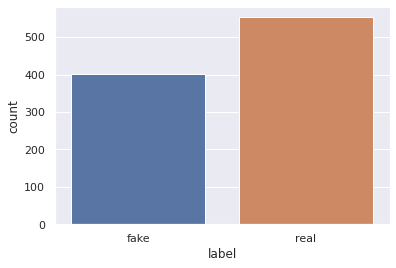

In [ ]:
sns.countplot(x="label", data=pf_articles_df);

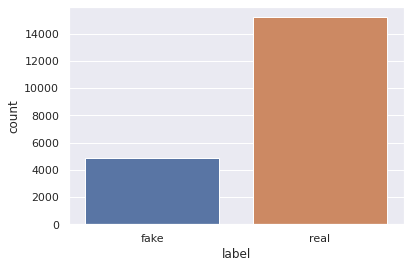

In [ ]:
sns.countplot(x="label", data=gc_articles_df);

In [ ]:
pf_articles_df['dataset'] = 'politifact'
gc_articles_df['dataset'] = 'gossipcop'
combined_df = pd.concat([pf_articles_df,gc_articles_df])
# combined_df.head()

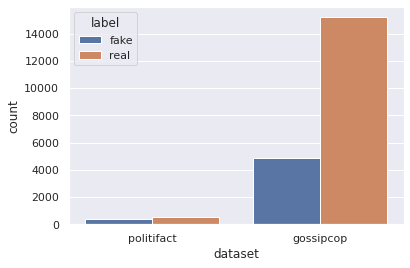

In [ ]:
sns.countplot(x="dataset", hue='label', data=combined_df);

## (2) Wordclouds

In [ ]:
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["want", "know", "think", "look", "include", "come", "year", "need","thing", "way", 'tj', 'td', 'tw'])

def generate_wordcloud(tweets_list, data_variable):
  text = ' '.join(list(map(lambda x: x[data_variable].astype(str), tweets_list)))
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
# Split into real and fake for each data source (poltifact and gossipcop)
# Articles + Text + Concat Tweets
politifact_article_real = list(filter(lambda x: x['label'] =='real',pf_articles))
politifact_article_fake = list(filter(lambda x: x['label'] =='fake',pf_articles))
gossipcop_article_real = list(filter(lambda x: x['label'] =='real', gc_articles))
gossipcop_article_fake = list(filter(lambda x: x['label'] =='fake', gc_articles))

# Split into real and fake for each data source (poltifact and gossipcop)
# Tweets Text
politifact_tweets_real = list(filter(lambda x: x['label'] =='real',pf_tweets))
politifact_tweets_fake = list(filter(lambda x: x['label'] =='fake',pf_tweets))
gossipcop_tweets_real = list(filter(lambda x: x['label'] =='real', gc_tweets))
gossipcop_tweets_fake = list(filter(lambda x: x['label'] =='fake', gc_tweets))

#### 2.1 Cleaned Article + Title

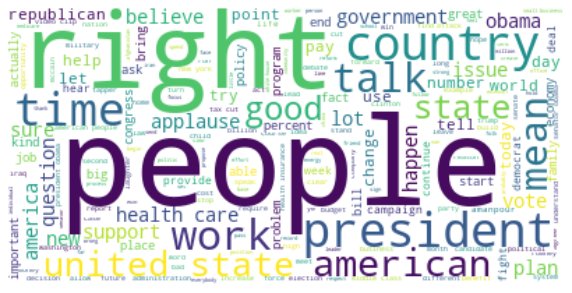

In [ ]:
# Politifact Real
generate_wordcloud(politifact_article_real, 'text_clean') 

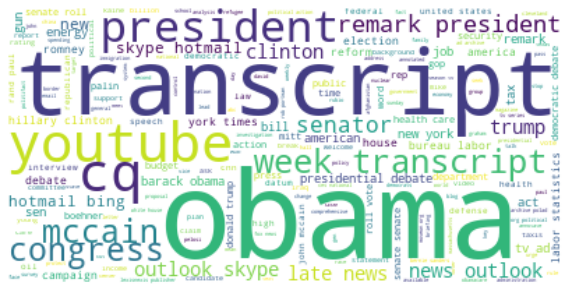

In [ ]:
# Politifact Real
generate_wordcloud(politifact_article_real, 'title_clean') 

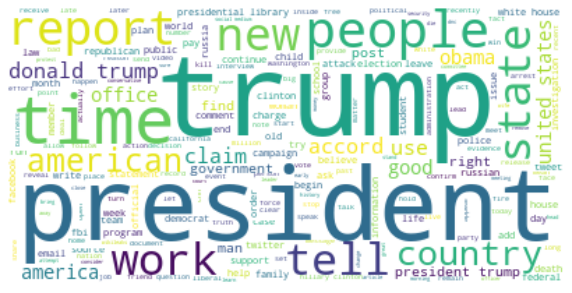

In [ ]:
# Politifact fake
generate_wordcloud(politifact_article_fake,'text_clean')  

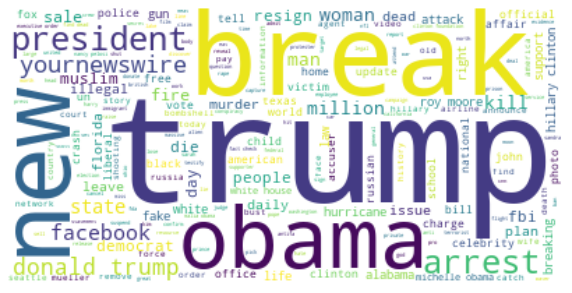

In [ ]:
# Politifact fake
generate_wordcloud(politifact_article_fake,'title_clean')  

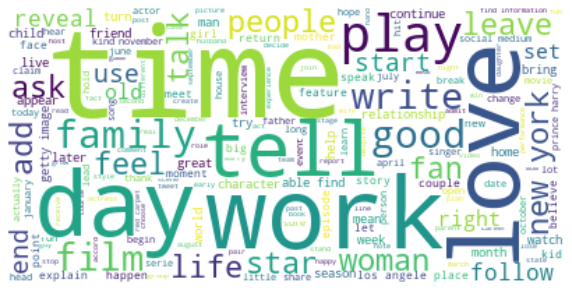

In [ ]:
# Gossipcop Real
generate_wordcloud(gossipcop_article_real, 'text_clean')  

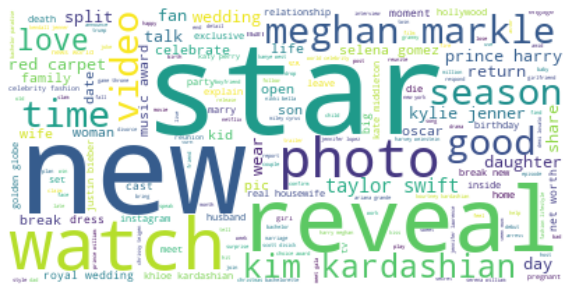

In [ ]:
# Gossipcop Real
generate_wordcloud(gossipcop_article_real, 'title_clean')  

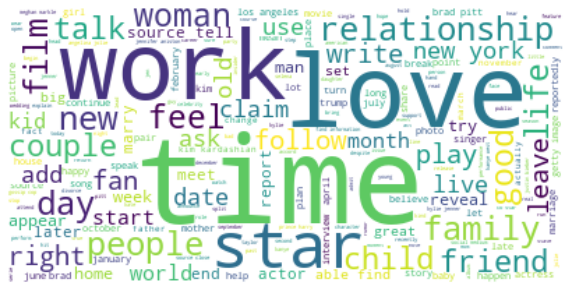

In [ ]:
# Gossipcop fake
generate_wordcloud(gossipcop_article_fake, 'text_clean') 

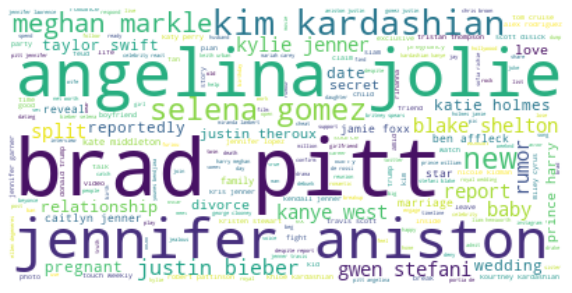

In [ ]:
# Gossipcop fake
generate_wordcloud(gossipcop_article_fake, 'title_clean') 

#### 2.2 Cleaned Tweets

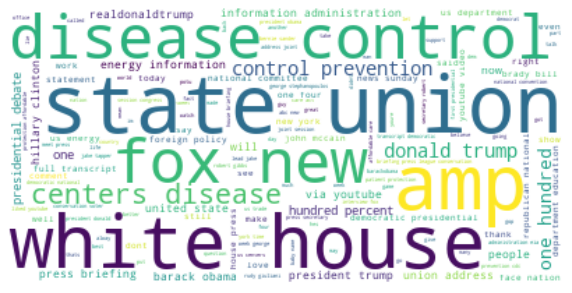

In [ ]:
# Politifact Real
generate_wordcloud(politifact_tweets_real, 'full_text_clean') 

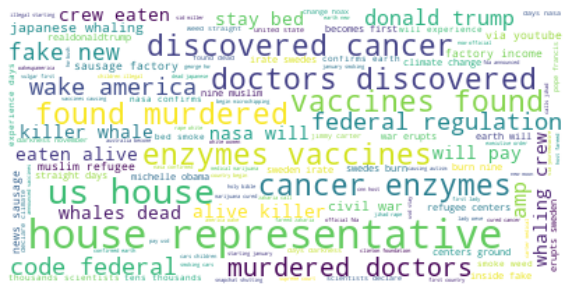

In [ ]:
# Politifact fake
generate_wordcloud(politifact_tweets_fake,'full_text_clean')  

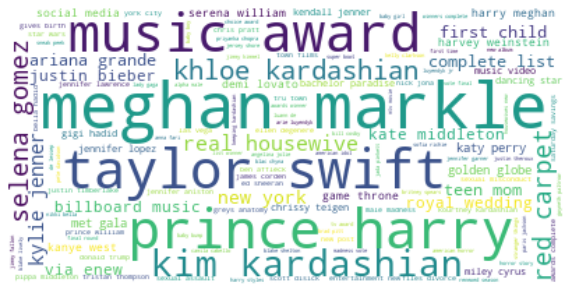

In [ ]:
# Gossipcop Real
generate_wordcloud(gossipcop_tweets_real, 'full_text_clean')  

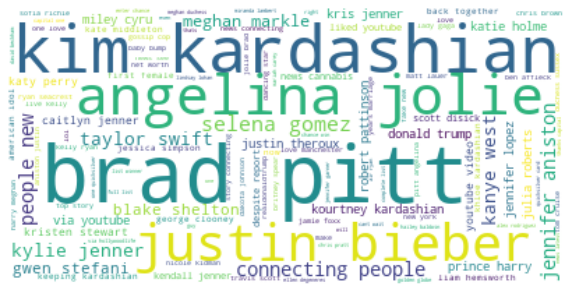

In [ ]:
# Gossipcop fake
generate_wordcloud(gossipcop_tweets_fake, 'full_text_clean') 

#### 2.3 Cleaned Concat Tweets

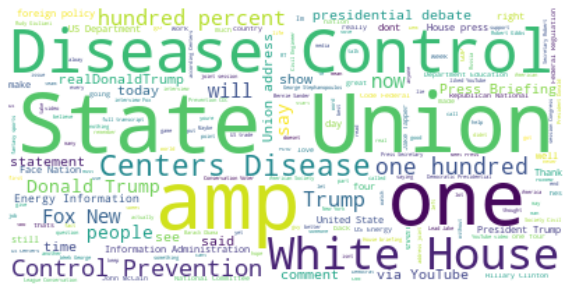

In [ ]:
# Politifact Real
generate_wordcloud(politifact_article_real, 'tweets_text') 

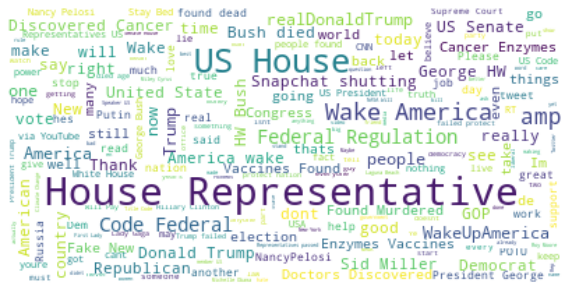

In [ ]:
# Politifact fake
generate_wordcloud(politifact_article_fake,'tweets_text')  

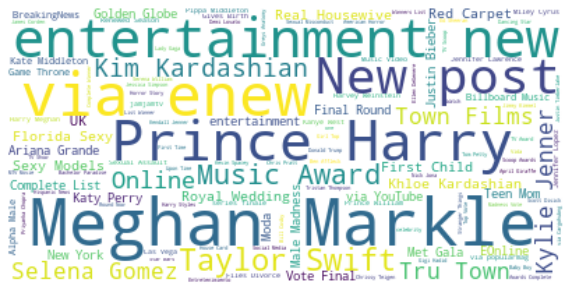

In [ ]:
# Gossipcop Real
generate_wordcloud(gossipcop_article_real, 'tweets_text')  

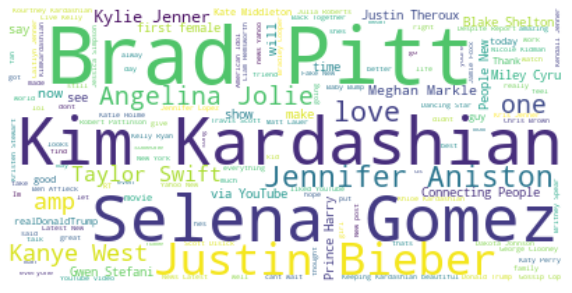

In [ ]:
# Gossipcop fake
generate_wordcloud(gossipcop_article_fake, 'tweets_text') 

## (3) Density Distribution of Text Data

In [ ]:
def get_article_length(article):
  return len(article.split(' '))

def remove_tags(text):
  text = re.sub("\n",' ', text)
  text = re.sub("\'", "'", text)
  text = re.sub(' +', ' ', text)
  return text

def generate_text_dist(tweet_list_real, tweet_list_fake, data_variable, text_len_limit):
  tweets_real = list(map(lambda x: remove_tags(x[data_variable]), tweet_list_real))
  tweets_real_len = list(map(lambda x: get_article_length(x), tweets_real))
  tweets_fake = list(map(lambda x: remove_tags(x[data_variable]), tweet_list_fake))
  tweets_fake_len = list(map(lambda x: get_article_length(x), tweets_fake))

  labels = ['fake','real']

  sns.set(style="darkgrid")
  fig = sns.kdeplot(tweets_real_len, label = 'real', shade=True, color='r')
  fig = sns.kdeplot(tweets_fake_len, label = 'fake', shade=True, color='b')

  plt.legend(prop={'size': 16}, title = 'Labels')
  plt.title(f'Density distribution of {data_variable} for real and fake news')
  plt.xlabel(f'{data_variable} length')
  plt.ylabel('Density')
  plt.xlim(0,text_len_limit)
  plt.show()

#### 3.1 Cleaned Article Length


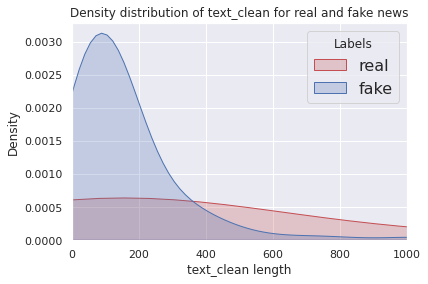

In [ ]:
# Politifact
generate_text_dist(politifact_article_real, politifact_article_fake, 'text_clean', 1000)

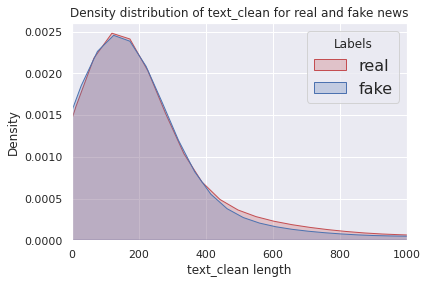

In [ ]:
# Gossipcop
generate_text_dist(gossipcop_article_real, gossipcop_article_fake, 'text_clean', 1000)

#### 3.2 Cleaned Title Length


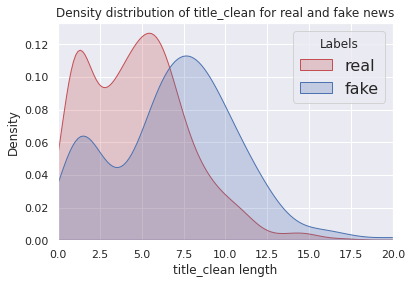

In [ ]:
# Politifact
generate_text_dist(politifact_article_real, politifact_article_fake, 'title_clean', 20)

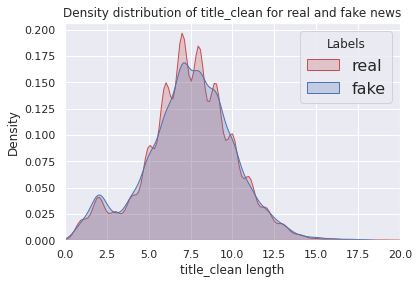

In [ ]:
# Gossipcop
generate_text_dist(gossipcop_article_real, gossipcop_article_fake, 'title_clean', 20)

#### 3.3 Cleaned Tweets Length


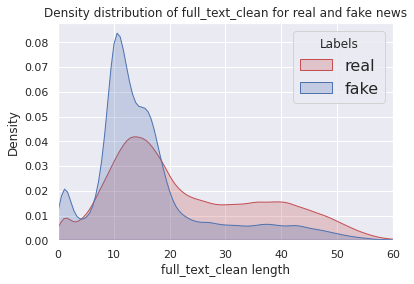

In [ ]:
# Politifact
generate_text_dist(politifact_tweets_real, politifact_tweets_fake, 'full_text_clean', 60)

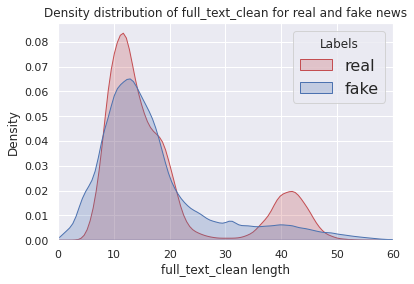

In [ ]:
# Gossipcop
generate_text_dist(gossipcop_tweets_real, gossipcop_tweets_fake, 'full_text_clean', 60)

#### 3.4 Concat Tweets Length

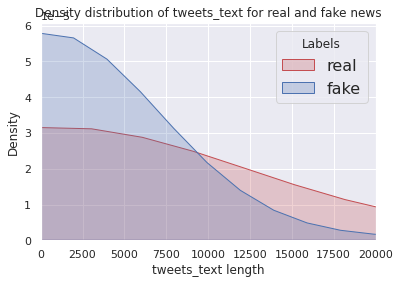

In [ ]:
# Politifact
generate_text_dist(politifact_article_real, politifact_article_fake, 'tweets_text', 20000)

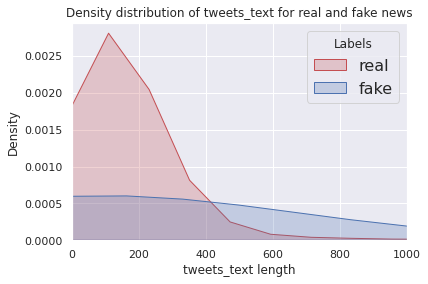

In [ ]:
# Gossipcop
generate_text_dist(gossipcop_article_real, gossipcop_article_fake, 'tweets_text', 1000)

#### 3.5 Tweets Average Score for each news article

In [ ]:
def generate_article_tweets_avg_sa(tweet_real, tweet_fake, xlimit):
  labels = ['fake','real']

  sns.set(style="darkgrid")
  fig = sns.kdeplot(tweet_real['tweets_avg_sa_score'], label = 'real', shade=True, color='r')
  fig = sns.kdeplot(tweet_fake['tweets_avg_sa_score'], label = 'fake', shade=True, color='b')

  plt.legend(prop={'size': 16}, title = 'Labels')
  plt.title('Density distribution of average sentiment score for real and fake news')
  plt.xlabel('Average score')
  plt.ylabel('Density')
  plt.xlim(0, xlimit)
  plt.show()

In [ ]:
pf_articles_df_real = pf_articles_df[pf_articles_df.label == 'real']
pf_articles_df_fake = pf_articles_df[pf_articles_df.label == 'fake']
gc_articles_df_real = gc_articles_df[gc_articles_df.label == 'real']
gc_articles_df_fake = gc_articles_df[gc_articles_df.label == 'fake']

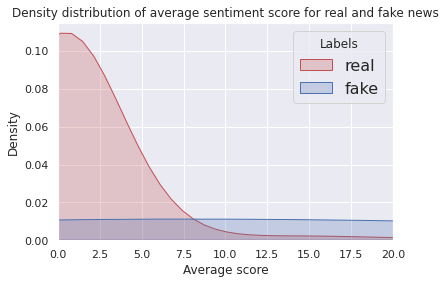

In [ ]:
# Politifact
generate_article_tweets_avg_sa(pf_articles_df_real, pf_articles_df_fake, 20)

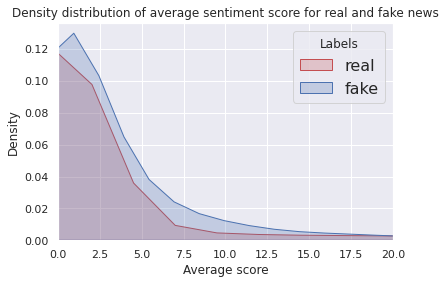

In [ ]:
# Gossipcop
generate_article_tweets_avg_sa(gc_articles_df_real, gc_articles_df_fake, 20)

## (4) Time Analysis


#### 4.1 Article Posted Time analysis 

In [171]:
# remove NaN
pf_nonull= pf_articles_df[pf_articles_df['published_time'].isna() == False]
gc_nonull= gc_articles_df[gc_articles_df['published_time'].isna() == False]

# Check NaN real/fake 
pf_nonull_real = pf_nonull[pf_nonull['label']=='real']
pf_nonull_fake = pf_nonull[pf_nonull['label']=='fake']

print("[Politifact]")
print(f'Politifact: {round(len(pf_nonull)/len(pf_articles_df)*100,2)}%')
print(f'Politifact fake %: {round(len(pf_nonull_fake)/len(pf_nonull)*100,2)}%')
print(f'Politifact real %: {round(len(pf_nonull_real)/len(pf_nonull)*100,2)}%')

gc_nonull_real = gc_nonull[gc_nonull['label']=='real']
gc_nonull_fake = gc_nonull[gc_nonull['label']=='fake']
print("\n[Gossipcop]")
print(f'Gossipcop: {round(len(gc_nonull)/len(gc_articles_df)*100,2)}%')
print(f'Gossipcop fake %: {round(len(gc_nonull_fake)/len(gc_nonull)*100,2)}%')
print(f'Gossipcop real %: {round(len(gc_nonull_real)/len(gc_nonull)*100,2)}%')


[Politifact]
Politifact: 30.4%
Politifact fake %: 72.76%
Politifact real %: 27.24%

[Gossipcop]
Gossipcop: 46.76%
Gossipcop fake %: 27.64%
Gossipcop real %: 72.36%


In [172]:
# Keep NaN
pf_null= pf_articles_df[pf_articles_df['published_time'].isna()]
gc_null= gc_articles_df[gc_articles_df['published_time'].isna()]

# Check NaN real/fake 
pf_null_real = pf_null[pf_null['label']=='real']
pf_null_fake = pf_null[pf_null['label']=='fake']

print("[Politifact]")
print(f'Politifact: {round(len(pf_null)/len(pf_articles_df)*100,2)}%')
print(f'Politifact fake %: {round(len(pf_null_fake)/len(pf_null)*100,2)}%')
print(f'Politifact real %: {round(len(pf_null_real)/len(pf_null)*100,2)}%')

gc_null_real = gc_null[gc_null['label']=='real']
gc_null_fake = gc_null[gc_null['label']=='fake']
print("\n[Gossipcop]")
print(f'Gossipcop: {round(len(gc_null)/len(gc_articles_df)*100,2)}%')
print(f'Gossipcop fake %: {round(len(gc_null_fake)/len(gc_null)*100,2)}%')
print(f'Gossipcop real %: {round(len(gc_null_real)/len(gc_null)*100,2)}%')


[Politifact]
Politifact: 69.6%
Politifact fake %: 28.61%
Politifact real %: 71.39%

[Gossipcop]
Gossipcop: 53.24%
Gossipcop fake %: 21.11%
Gossipcop real %: 78.89%


#### 4.2 Tweets Time analysis 

In [81]:
pf_tweets_df["created_at"] = pf_tweets_df["created_at"].astype('datetime64[ns]') 
pf_tweets_df["created_at"] = pf_tweets_df.created_at.dt.to_pydatetime()
pf_tweets_df['parsed_date'] = pf_tweets_df['created_at'].dt.strftime('%m/%d/%Y')
pf_tweets_df['parsed_month'] = pf_tweets_df['created_at'].dt.strftime('%m')
pf_tweets_df['parsed_hour'] = pf_tweets_df['created_at'].dt.strftime('%H')

gc_tweets_df["created_at"] = gc_tweets_df["created_at"].astype('datetime64[ns]') 
gc_tweets_df["created_at"] = gc_tweets_df.created_at.dt.to_pydatetime()
gc_tweets_df['parsed_date'] = gc_tweets_df['created_at'].dt.strftime('%m/%d/%Y')
gc_tweets_df['parsed_month'] = gc_tweets_df['created_at'].dt.strftime('%m')
gc_tweets_df['parsed_hour'] = gc_tweets_df['created_at'].dt.strftime('%H')

In [83]:
pf_articles_df.dtypes

id                      object
text                    object
title                   object
publish_date           float64
source                  object
url                     object
publisher               object
dataset                 object
label                   object
title_clean             object
text_clean              object
published_time          object
tweets_text             object
tweets_len               int64
tweets_avg_sa_score    float64
dtype: object

Text(0.5, 1.0, 'Politifact Tweets by Month')

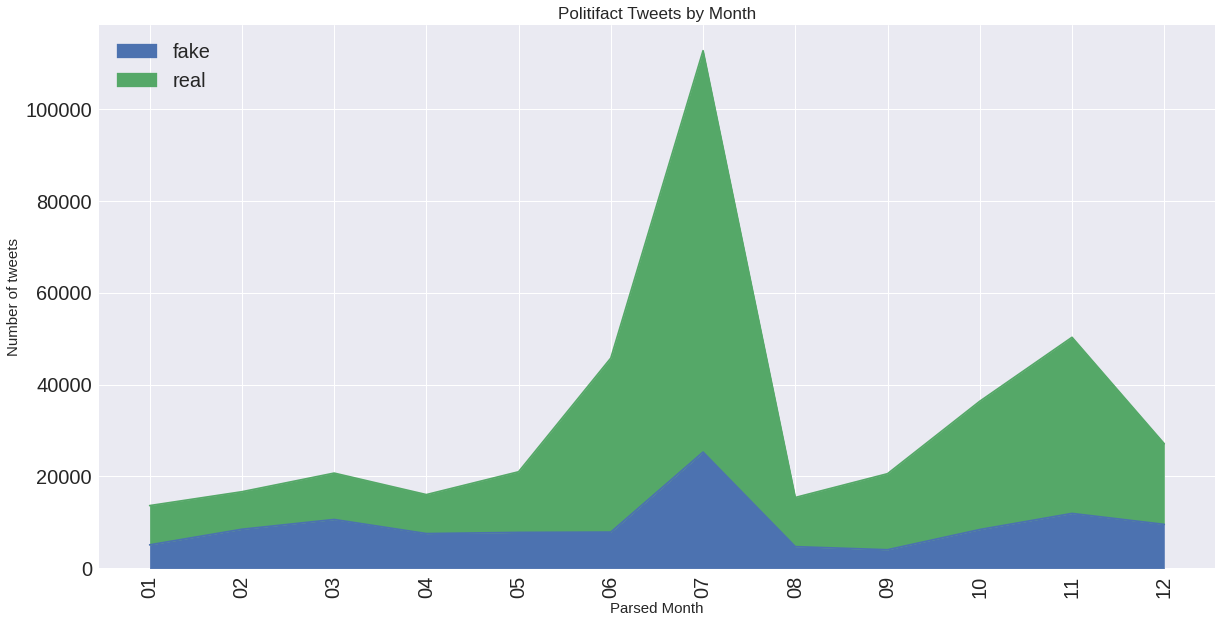

In [ ]:
# Politifact By Month
x = pf_tweets_df.groupby(['label','parsed_month']).count().reset_index()

plt.style.use('seaborn')

pf_tweets_df.groupby(['label','parsed_month']).count().unstack('label').reset_index().plot.area(x='parsed_month', y='id',figsize=(20,10)).legend(loc=2, prop={'size': 20})
plt.xticks(x[:12].index, x['parsed_month'], rotation=90)
plt.xlabel('Parsed Month', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.title('Politifact Tweets by Month',fontsize=17)

Text(0.5, 1.0, 'Politifact Tweets by Hour')

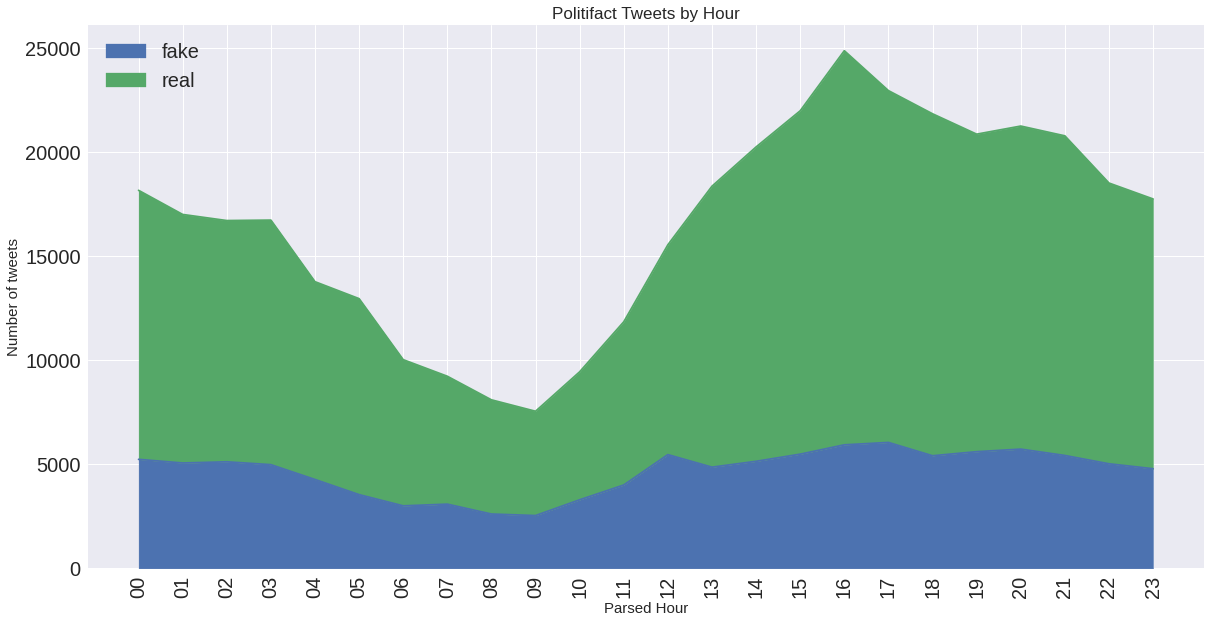

In [ ]:
# Politifact By Hour
x = pf_tweets_df.groupby(['label','parsed_hour']).count().reset_index()

plt.style.use('seaborn')

pf_tweets_df.groupby(['label','parsed_hour']).count().unstack('label').reset_index().plot.area(x='parsed_hour', y='id',figsize=(20,10)).legend(loc=2, prop={'size': 20})
plt.xticks(x[:24].index, x['parsed_hour'], rotation=90)
plt.xlabel('Parsed Hour', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.title('Politifact Tweets by Hour',fontsize=17)

Text(0.5, 1.0, 'Gossipcop Tweets by Month')

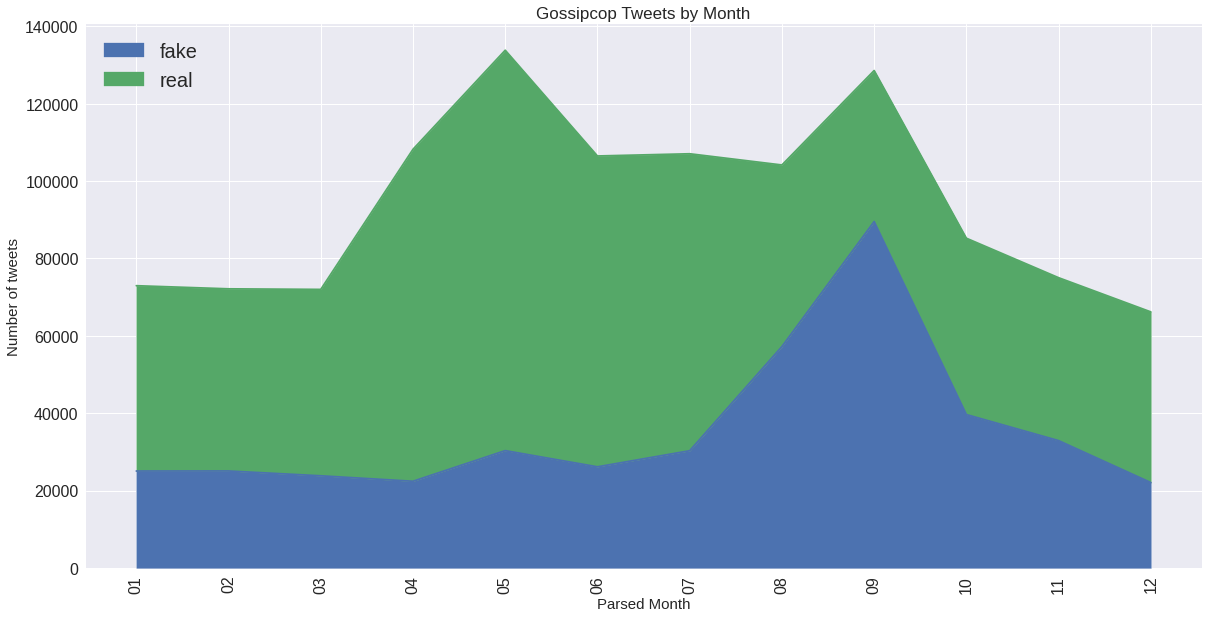

In [ ]:
# Gossipcop By Month
x = gc_tweets_df.groupby(['label','parsed_month']).count().reset_index()

plt.style.use('seaborn')

gc_tweets_df.groupby(['label','parsed_month']).count().unstack('label').reset_index().plot.area(x='parsed_month', y='id',figsize=(20,10)).legend(loc=2, prop={'size': 20})
plt.xticks(x[:12].index, x['parsed_month'], rotation=90)
plt.xlabel('Parsed Month', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')
plt.title('Gossipcop Tweets by Month',fontsize=17)

Text(0.5, 1.0, 'Gossipcop Tweets by Hour')

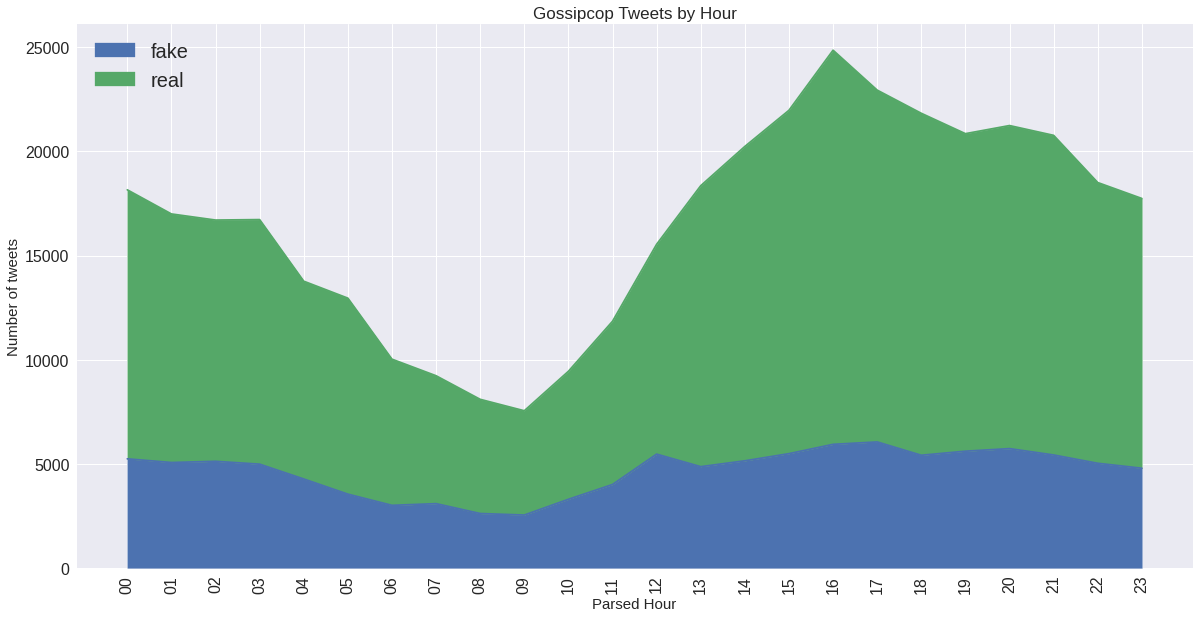

In [ ]:
# Politifact By Hour
x = pf_tweets_df.groupby(['label','parsed_hour']).count().reset_index()

plt.style.use('seaborn')

pf_tweets_df.groupby(['label','parsed_hour']).count().unstack('label').reset_index().plot.area(x='parsed_hour', y='id',figsize=(20,10)).legend(loc=2, prop={'size': 20})
plt.xticks(x[:24].index, x['parsed_hour'], rotation=90)
plt.xlabel('Parsed Hour', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')
plt.title('Gossipcop Tweets by Hour',fontsize=17)

#### 4.3 Temporal Tweet Engagement

In [41]:
keyword = 'trump'
search_df =  pf_articles_df[pf_articles_df['text_clean'].str.contains(keyword)]
search_df = search_df[search_df['tweets_len']>1000]
search_df = search_df[search_df['published_time'].isna() == False]

# Read thru list 
search_df

id                                               text  \
1    politifact14384  Representative Bob Goodlatte will miss out on ...   
71   politifact15501  According to the latest FOX News poll Presiden...   
94   politifact15399  The death toll in one Ohio town continues to r...   
153  politifact15147  George Soros—the Billionaire investment banker...   
198  politifact13973  In Tbilisi, the two-room rented apartment Mr. ...   
256  politifact14126  Breaking News: FBI Uncovers Evidence That 62 M...   
379  politifact14043  Washington (dpo) – As part of his plan to impr...   
394  politifact15137  Donald Trump took a major step toward securing...   
395  politifact14888  President Donald Trump and the Republicans in ...   
636  politifact13855  Roosevelt Room\n\n11:27 A.M. EDT\n\nTHE PRESID...   
661  politifact14036  A transcript of an Oval Office interview Frida...   
877  politifact13352  CLEVELAND — Donald J. Trump, on the eve of acc...   

                                                 title  publish_date  \
1    Peter Strzok, FBI Agent in Texting Scandal, Wi...  1.529313e+09   
71   TRUMP APPROVAL RATING Better than Obama and Re...  1.528552e+09   
94         BREAKING: 60 People Just Found Dead In Ohio  1.526218e+09   
153  International Arrest Warrant Issued for George...  1.479844e+09   
198  Inside a Fake News Sausage Factory: ‘This Is A...  1.480003e+09   
256  Breaking News: FBI Uncovers Evidence That 62 M...  1.500297e+09   
379    TRUMP WANTS TO DEPORT AMERICAN INDIANS TO INDIA  1.493050e+09   
394  Miley Cyrus: ‘Donald Trump Is a F–king Nightmare’  1.456946e+09   
395  Trump Vows to End Winter Heating Assistance fo...  1.511721e+09   
636  Remarks by President Trump in a Listening Sess...  1.489334e+09   
661                                               null  1.618920e+09   
877  Donald Trump Sets Conditions for Defending NAT...  1.469030e+09   

                               source  \
1                    http://nymag.com   
71   https://www.thegatewaypundit.com   
94            https://web.archive.org   
153     http://patrioticviralnews.com   
198           https://www.nytimes.com   
256                https://medium.com   
379           https://web.archive.org   
394      https://www.rollingstone.com   
395           https://web.archive.org   
636           https://web.archive.org   
661                https://apnews.com   
877            http://www.nytimes.com   

                                                   url  \
1    https://nymag.com/intelligencer/2018/06/fbi-ag...   
71   https://www.thegatewaypundit.com/2018/06/trump...   
94   https://web.archive.org/web/20180517203012/htt...   
153  https://www.patrioticviralnews.com/articles/in...   
198  https://www.nytimes.com/2016/11/25/world/europ...   
256  https://medium.com/@bobcrane_55517/breaking-ne...   
379  https://web.archive.org/web/20170426151139/htt...   
394  https://www.rollingstone.com/politics/politics...   
395  https://web.archive.org/web/20180203024411/htt...   
636  https://web.archive.org/web/20170313220530/htt...   
661  https://apnews.com/c810d7de280a47e88848b0ac746...   
877  https://www.nytimes.com/2016/07/21/us/politics...   

                   publisher     dataset label  \
1              Intelligencer  politifact  fake   
71        The Gateway Pundit  politifact  fake   
94            TRUE AMERICANS  politifact  fake   
153     Patriotic Viral News  politifact  fake   
198                      NaN  politifact  fake   
256                   Medium  politifact  fake   
379  I Love Native Americans  politifact  fake   
394            Rolling Stone  politifact  fake   
395                Our Voice  politifact  fake   
636           whitehouse.gov  politifact  real   
661                  AP NEWS  politifact  real   
877                      NaN  politifact  real   

                                           title_clean  \
1    peter strzok fbi agent texte scandal testify c...   
71   trump approval rating better obama reagan po

In [42]:
# Choose fake news and real news with similar topics
# fake: politifact15501
fake_article_id = 'politifact15501'
# real : politifact12079
real_article_id = 'politifact13352'

In [9]:
fake_title = pf_articles_df[pf_articles_df['id']== fake_article_id].title.values[0]
fake_title

'TRUMP APPROVAL RATING Better than Obama and Reagan at Same Point in their Presidencies'

In [10]:
fake_article = pf_articles_df[pf_articles_df['id']== fake_article_id].text.values[0]
print(fake_article)

According to the latest FOX News poll President Donald Trump has a better rating than Presidents Obama and Reagan at the same point in their presidencies.

President Trump’s approval is now at 45%.

And that is with 90% negative coverage from the far left mainstream media.

President Trump – 45%

President Obama – 44%

President Reagan – 44%

TRENDING: "When You're Lying to the People and You're the Media, It's a Bad Business Model" -- MUST SEE: AZ Gubernatorial Candidate Kari Lake ABSOLUTELY DESTROYS ABC Rookie Reporter in Attempted Hit Job (VIDEO)

On June 9, 2010 Barack Obama’s approval number was 46% on the Rasmussen poll.

President Trump’s approval number is at 47% according to Rasmussen today.

Again…. That is with 90% extremely negative coverage for President Trump!


In [11]:
title = pf_articles_df[pf_articles_df['id']== real_article_id].title.values[0]
title

'The Democratic Debate in Cleveland'

In [12]:
real_article = pf_articles_df[pf_articles_df['id']== real_article_id].text.values[0]
print(real_article)

This is rightly a big issue in Ohio. And I have laid out my criticism, but in addition my plan, for actually fixing NAFTA. Again, I have received a lot of incoming criticism from Senator Obama. And the Cleveland Plain Dealer examined Senator Obama's attacks on me regarding NAFTA and said they were erroneous. So I would hope that, again, we can get to a debate about what the real issues are and where we stand because we do need to fix NAFTA. It is not working. It was, unfortunately, heavily disadvantaging many of our industries, particularly manufacturing. I have a record of standing up for that, of chairing the Manufacturing Caucus in the Senate, and I will take a tough position on these trade agreements.

MR. WILLIAMS: Senator, thank you.

Before we turn the questioning over to Tim Russert, Senator Obama.

SEN. OBAMA: Well, I think that it is inaccurate for Senator Clinton to say that she's always opposed NAFTA. In her campaign for Senate, she said that NAFTA, on balance, had been goo

In [13]:
def getTweets(article_df, article_id, tweets_list):
  tweets = list(filter(lambda x: x['article_id'] == article_id, tweets_list))
  for tweet in tweets: 
    print("---------")
    print(tweet['full_text'].lower())
  df = pd.DataFrame(tweets)
  return df

In [14]:
fake_tweets = getTweets(pf_articles_df, fake_article_id, pf_tweets)

---------
trump approval rating better than obama and reagan at same point in their presidencies https://t.co/qyj9lvfsqn via @gatewaypundit
---------
trump approval rating better than obama and reagan at same point in their presidencies https://t.co/eux8kxvqvh
---------
trump approval rating better than obama and reagan at same point in their presidencies. https://t.co/szernboiu1 #maga
---------
but the liberal narrative!!!!!11!!!  trump approval rating better than obama and reagan at same point in their presidencies. https://t.co/qzzyed1pmz
---------
trump approval rating better than obama and reagan at same point in their presidencies https://t.co/qalbey2iaf via @gatewaypundit
---------
trump approval rating better than obama and reagan at same point in their presidencies https://t.co/pps7bdlsyc via @gatewaypundit
---------
trump approval rating better than obama and reagan at same point in their presidencies - https://t.co/pfaegrtnjv
---------
trump approval rating better than obama

In [15]:
fake_tweets.dtypes

dataset                           object
label                             object
article_id                        object
user                              object
created_at                        object
id                                 int64
full_text                         object
source                            object
geo                               object
coordinates                       object
place                             object
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensitive                object
possibly_sensitive_appealable     object
lang                              object
full_text_clean                   object
tweet_sa_label                    object
tweet_sa_score                   float64
dtype: object

In [16]:
fake_tweets["created_at"] = fake_tweets["created_at"].astype('datetime64[ns]') 
fake_tweets["created_at"] = fake_tweets.created_at.dt.to_pydatetime()
fake_tweets['parsed_date'] = fake_tweets['created_at'].dt.strftime('%m/%d/%Y')

fake_tweets = fake_tweets.sort_values(by="created_at", ascending=True)
fake_tweets['retweet_cumsum'] = fake_tweets['retweet_count'].cumsum()
fake_tweets['count'] = 1
fake_tweets['tweet_count'] = fake_tweets['count'].cumsum()
#fake_tweets

In [17]:
min(fake_tweets['parsed_date']),max(fake_tweets['parsed_date'])

('06/09/2018', '08/03/2018')

In [60]:
pf_articles_df.dtypes

id                      object
text                    object
title                   object
publish_date           float64
source                  object
url                     object
publisher               object
dataset                 object
label                   object
title_clean             object
text_clean              object
published_time          object
tweets_text             object
tweets_len               int64
tweets_avg_sa_score    float64
dtype: object

In [68]:
news_date = pf_articles_df[pf_articles_df['id']== real_article_id].published_time.values[0]
news_date = pd.to_datetime(news_date).strftime('%m/%d/%Y')
news_date

'07/21/2016'

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

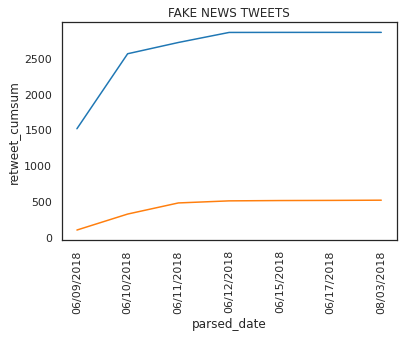

In [79]:
sns.set_theme(style="white", palette=None)
#plt.figure(figsize=(20,5))
sns.lineplot(data=fake_tweets, x="parsed_date", y='retweet_cumsum', ci=None).set(title='FAKE NEWS TWEETS')
sns.lineplot(data=fake_tweets, x="parsed_date", y='tweet_count', ci=None)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

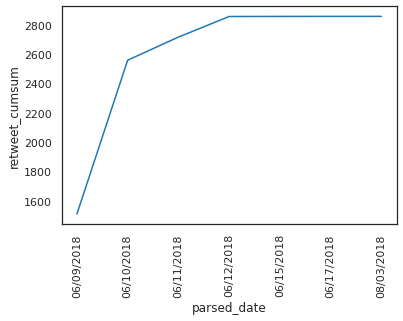

In [54]:
sns.lineplot(data=fake_tweets, x="parsed_date", y='retweet_cumsum', ci=None)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

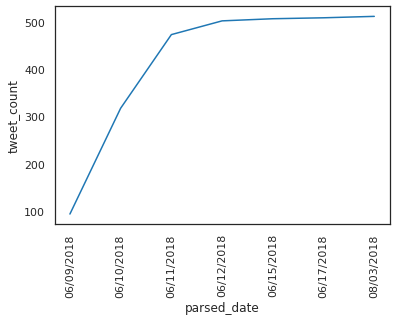

In [55]:
sns.lineplot(data=fake_tweets, x="parsed_date", y='tweet_count', ci=None)
plt.xticks(rotation=90)

In [43]:
real_tweets = getTweets(pf_articles_df, real_article_id, pf_tweets)

---------
donald trump sets conditions for defending nato allies against attack https://t.co/drdkxb5yem
---------
donald trump sets conditions for defending nato allies against attack https://t.co/cxczjj0lfn
---------
donald trump sets conditions for defending nato allies against attack https://t.co/eb0tpffvfi
---------
donald trump sets conditions for defending nato allies against attack https://t.co/axedd5lslx
---------
donald trump sets conditions for defending nato allies against attack: reiterating a hard-line nationalist ap... https://t.co/zcwy57rccp
---------
donald trump sets conditions for defending nato allies against attack - new… https://t.co/ewccoy9xmh #headlines https://t.co/pr8wotmxkx
---------
donald trump sets conditions for defending nato allies against attack https://t.co/9leobejpho
---------
donald trump sets conditions for defending nato allies against attack, via @nytimes https://t.co/2gekrjy4at
---------
"donald trump sets conditions for defending nato allies aga

In [44]:
real_tweets["created_at"] = real_tweets["created_at"].astype('datetime64[ns]') 
real_tweets["created_at"] = real_tweets.created_at.dt.to_pydatetime()
real_tweets['parsed_date'] = real_tweets['created_at'].dt.strftime('%m/%d/%Y')

real_tweets = real_tweets.sort_values(by="created_at", ascending=True)
real_tweets['retweet_cumsum'] = real_tweets['retweet_count'].cumsum()
real_tweets['count'] = 1
real_tweets['tweet_count'] = real_tweets['count'].cumsum()
#fake_tweets

In [45]:
min(real_tweets['parsed_date']),max(real_tweets['parsed_date'])

('01/03/2017', '12/28/2016')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text major ticklabel objects>)

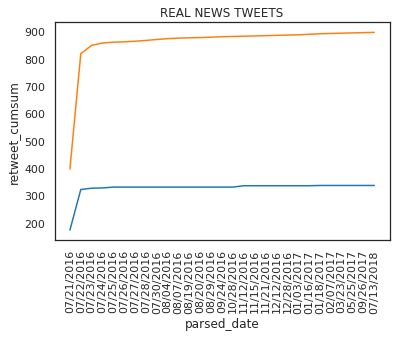

In [49]:
#plt.figure(figsize=(20,5))
sns.lineplot(data=real_tweets, x="parsed_date", y='retweet_cumsum', ci=None).set(title='REAL NEWS TWEETS')
sns.lineplot(data=real_tweets, x="parsed_date", y='tweet_count', ci=None)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text major ticklabel objects>)

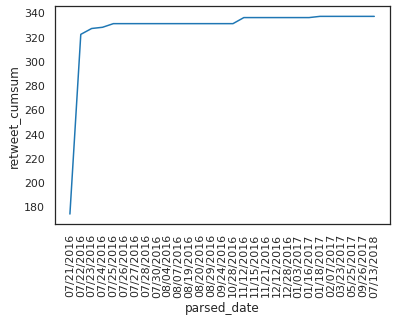

In [50]:
#plt.figure(figsize=(20,5))
sns.lineplot(data=real_tweets, x="parsed_date", y='retweet_cumsum', ci=None)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text major ticklabel objects>)

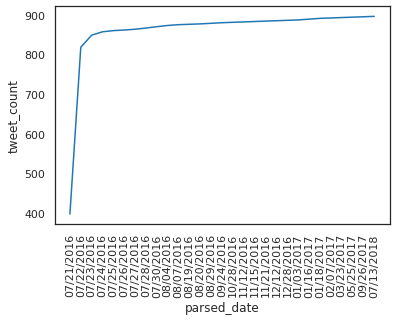

In [52]:
#plt.figure(figsize=(20,5))
sns.lineplot(data=real_tweets, x="parsed_date", y='tweet_count', ci=None)
plt.xticks(rotation=90)

## (5) Sentiment Analysis

#### 5.1 Sentiment analysis on news article text

In [ ]:
len(pf_articles_df),len(gc_articles_df)

(954, 20049)

In [91]:
def get_article_length(article):
  return len(article.split(' '))

pf_articles_df['tweets_len'] = pf_articles_df.apply(lambda row : get_article_length(row['tweets_text']) ,axis=1)
gc_articles_df['tweets_len'] = gc_articles_df.apply(lambda row : get_article_length(row['tweets_text']) ,axis=1)

# Due to computational limitations we sample only tweets lengths < 1000 words
pf_downsample = pf_articles_df[pf_articles_df['tweets_len'] < 10000]
gc_downsample = gc_articles_df[gc_articles_df['tweets_len'] < 10000]

len(pf_downsample),len(gc_downsample)

(868, 19865)

In [8]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 4.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [126]:
# ref: https://github.com/cjhutto/vaderSentiment
# get polarity scores using VADER (Valence Aware Dictionary and sEntiment Reasoner) 

import plotly.express as px
import plotly.graph_objects as go
def makeAxis(title, tickangle):
  return {
    'title': title,
    'titlefont': { 'size': 20 },
    'tickangle': tickangle,
    'tickfont': { 'size': 15 },
    'tickcolor': 'rgba(0,0,0,0)',
    'ticklen': 5,
    'showline': True,
    'showgrid': True
  }
def generate_tenary_plot_sample(tweets_df, data_variable, sample):
  df = tweets_df.sample(n = sample)
  #print(df)
  neg, pos, neu = [],[],[]
  for i, val in df.iterrows():
    # print(f"Processing {i}/{len(tweets_df)}")
    txt = str(df[data_variable][i])
    score = analyser.polarity_scores(txt)
    neg.append(score['neg'])
    pos.append(score['pos'])
    neu.append(score['neu'])

  df['neg'] = neg
  df['pos'] = pos
  df['neu'] = neu

  fig = px.scatter_ternary(df, a="neu", b="pos", c="neg", color='label' )
  fig.update_layout({
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('NEUTRAL', 0),
        'baxis': makeAxis('<br>POSITIVE', 45),
        'caxis': makeAxis('<br>NEGATIVE', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': '',
        'x': 0.5,
        'y': 1.3,
        'font': { 'size': 15 }
    }]
  })
  fig.show()
  #fig.write_image("pf_ternary_plot.svg")

def generate_tenary_plot(df, data_variable):
  neg, pos, neu = [],[],[]
  for i, val in df.iterrows():
    txt = str(df[data_variable][i])
    score = analyser.polarity_scores(txt)
    neg.append(score['neg'])
    pos.append(score['pos'])
    neu.append(score['neu'])

  df['neg'] = neg
  df['pos'] = pos
  df['neu'] = neu

  fig = px.scatter_ternary(df, a="neu", b="pos", c="neg", color='label', fontsize=20)
  fig.update_layout({
    'ternary': {
        'sum': 1,
        'aaxis': makeAxis('NEUTRAL', 0),
        'baxis': makeAxis('<br>POSITIVE', 45),
        'caxis': makeAxis('<br>NEGATIVE', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': '',
        'x': 0.5,
        'y': 1.3,
        'font': { 'size': 15 }
    }]
  })
  fig.show()
  #fig.write_image("pf_ternary_plot.svg")

In [ ]:
generate_tenary_plot(pf_articles_df, 'text_clean')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [ ]:
generate_tenary_plot_sample(gc_downsample, 'text_clean',1000) 

#### 5.2 Sentiment analysis on tweets comments for each article

In [128]:
generate_tenary_plot_sample(pf_downsample, 'tweets_text', 868)

In [129]:
generate_tenary_plot_sample(gc_downsample, 'tweets_text',1000) 

#### 5.3 Sentiment analysis on Tweets (Roberta-English)

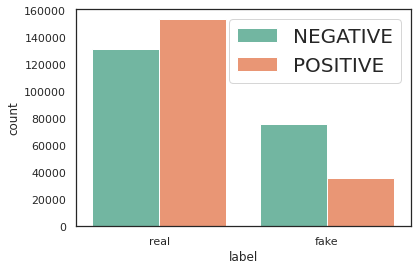

In [98]:
sns.countplot(x="label",hue='tweet_sa_label',palette="Set2", data=pf_tweets_df).legend(loc="upper right", frameon=True, fontsize=20);

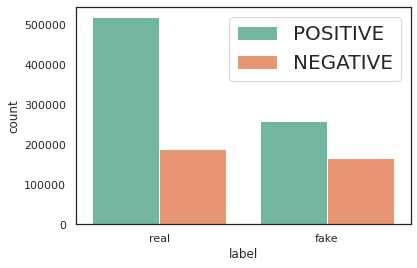

In [99]:
sns.countplot(x="label",hue='tweet_sa_label',palette="Set2", data=gc_tweets_df).legend(loc="upper right", frameon=True, fontsize=20);

[Text(0.5, 1.0, 'GOSSIPCOP')]

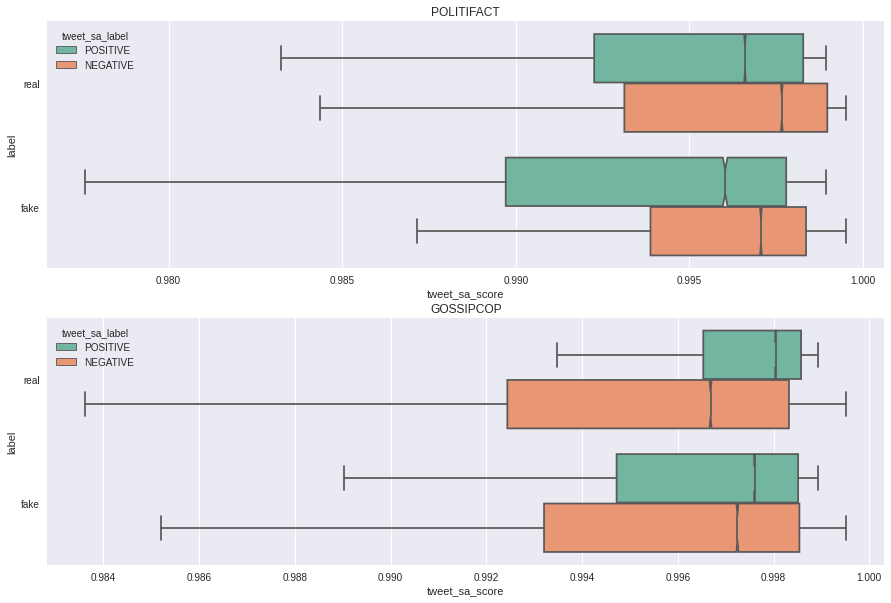

In [177]:
fig, axes = plt.subplots(2, 1, figsize =(15,10))
sns.boxplot(x='tweet_sa_score', y='label', notch = True, hue='tweet_sa_label',orient='h',palette="Set2",
            hue_order= ['POSITIVE', "NEGATIVE"],
            data=pf_tweets_df, showfliers=False, ax=axes[0]).set(title='POLITIFACT')

sns.boxplot(x='tweet_sa_score', y='label', notch = True, hue='tweet_sa_label',orient='h',palette="Set2",
            hue_order= ['POSITIVE', "NEGATIVE"],
            data=gc_tweets_df, showfliers=False, ax=axes[1]).set(title='GOSSIPCOP')


[Text(0.5, 1.0, 'GOSSIPCOP')]

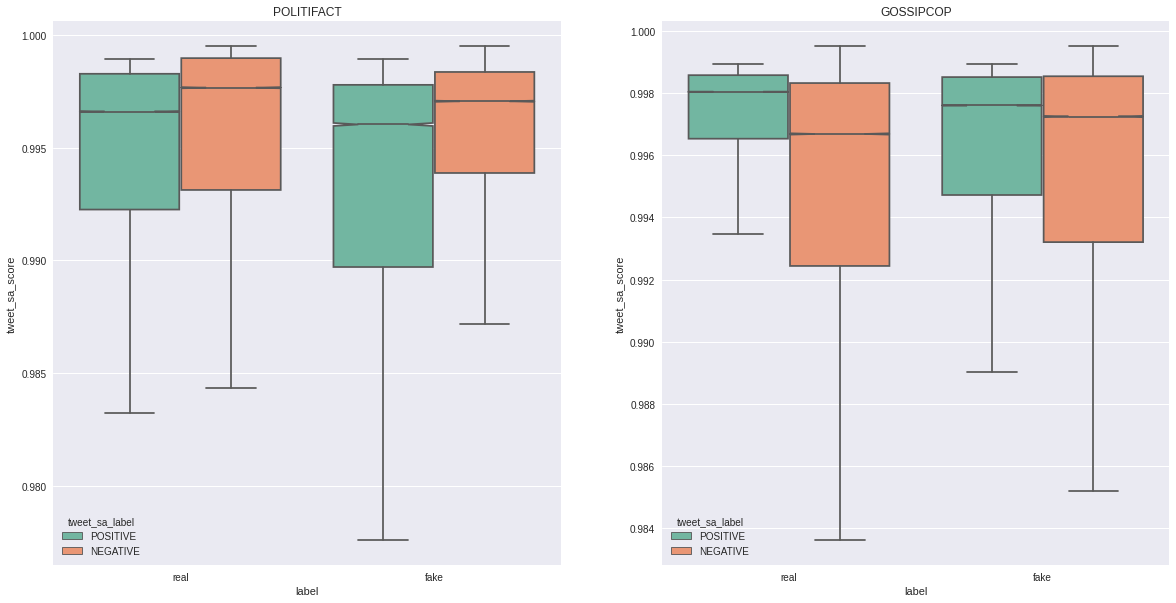

In [ ]:
fig, axes = plt.subplots(1, 2, figsize =(20,10))
sns.boxplot(x='label', y='tweet_sa_score', notch = True, hue='tweet_sa_label',orient='v',palette="Set2",
            hue_order= ['POSITIVE', "NEGATIVE"],
            data=pf_tweets_df, showfliers=False, ax=axes[0]).set(title='POLITIFACT')

sns.boxplot(x='label', y='tweet_sa_score', notch = True, hue='tweet_sa_label',orient='v',palette="Set2",
            hue_order= ['POSITIVE', "NEGATIVE"],
            data=gc_tweets_df, showfliers=False, ax=axes[1]).set(title='GOSSIPCOP')


(array([0.975, 0.98 , 0.985, 0.99 , 0.995, 1.   , 1.005]),
 <a list of 7 Text major ticklabel objects>)

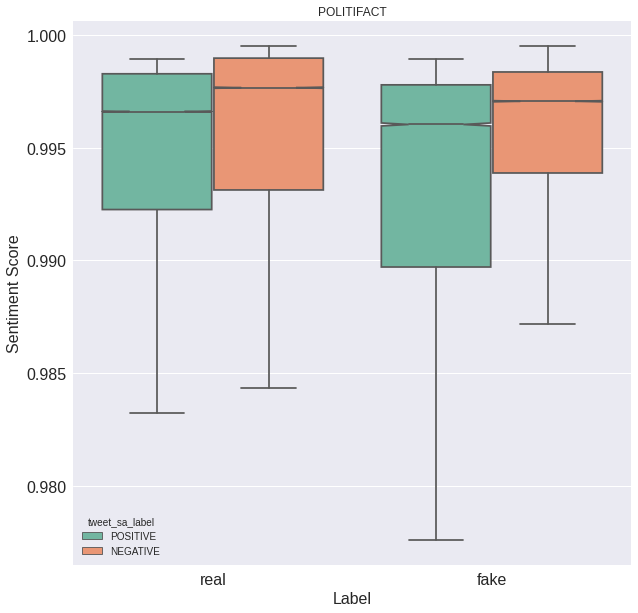

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='label', y='tweet_sa_score', notch = True, hue='tweet_sa_label',orient='v',palette="Set2",
            hue_order= ['POSITIVE', "NEGATIVE"],
            data=pf_tweets_df, showfliers=False).set(title='POLITIFACT')
plt.xlabel('Label', fontsize='16')
plt.ylabel('Sentiment Score', fontsize='16')
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')

(array([0.982, 0.984, 0.986, 0.988, 0.99 , 0.992, 0.994, 0.996, 0.998,
        1.   , 1.002]), <a list of 11 Text major ticklabel objects>)

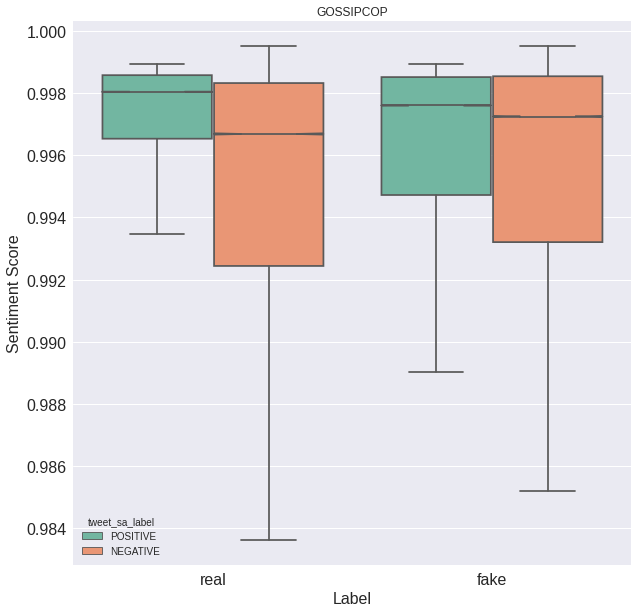

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='label', y='tweet_sa_score', notch = True, hue='tweet_sa_label',orient='v',palette="Set2",
            hue_order= ['POSITIVE', "NEGATIVE"],
            data=gc_tweets_df, showfliers=False).set(title='GOSSIPCOP')
plt.xlabel('Label', fontsize='16')
plt.ylabel('Sentiment Score', fontsize='16')
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')

In [ ]:
len(list(filter(lambda x: x['tweet_sa_score']<0.98, pf_tweets))),len(pf_tweets)

(28372, 396306)

In [ ]:
len(list(filter(lambda x: x['tweet_sa_score']<0.98, gc_tweets))),len(gc_tweets)

(44161, 1131724)

## (6) Favourites Count

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]), <a list of 11 Text major ticklabel objects>)

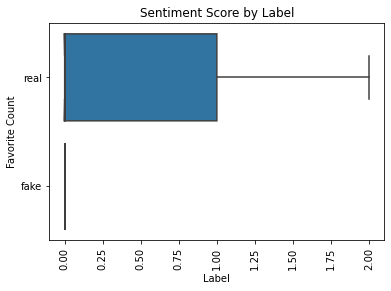

In [ ]:
sns.boxplot(x='favorite_count', y='label', notch = True,
            data=pf_tweets_df, showfliers=False).set(title='Sentiment Score by Label')
#modify axis labels
plt.xlabel('Label')
plt.ylabel('Favorite Count')
plt.xticks(rotation=90)

In [ ]:
def generate_tweet_attr_dist(tweet_list_real, tweet_list_fake, data_variable, xlimit):
  tweets_real = list(map(lambda x: x['user'][data_variable], tweet_list_real))
  tweets_fake = list(map(lambda x: x['user'][data_variable], tweet_list_fake))

  labels = ['fake','real']

  sns.set(style="darkgrid")
  fig = sns.kdeplot(tweets_real, label = 'real', shade=True, color='r')
  fig = sns.kdeplot(tweets_fake, label = 'fake', shade=True, color='b')

  plt.legend(prop={'size': 16}, title = 'Labels')
  plt.title(f'Density distribution of {data_variable} count for real and fake news')
  plt.xlabel('Follower Count')
  plt.ylabel('Density')
  plt.xlim(0, xlimit)
  plt.show()

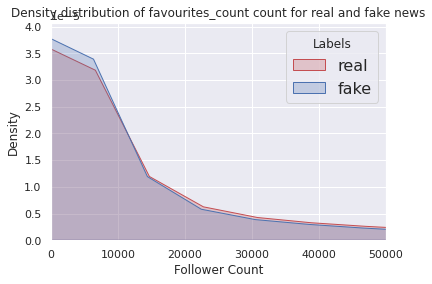

In [ ]:
generate_tweet_attr_dist(politifact_tweets_real, politifact_tweets_fake, 'favourites_count', 50000)

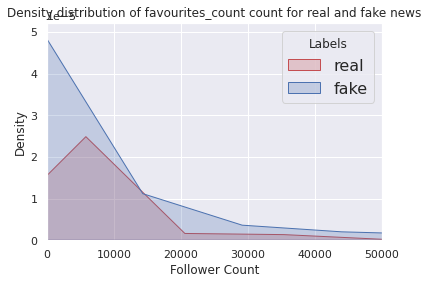

In [ ]:
generate_tweet_attr_dist(gossipcop_tweets_real, gossipcop_tweets_fake, 'favourites_count', 50000)

## (7) Followers Count

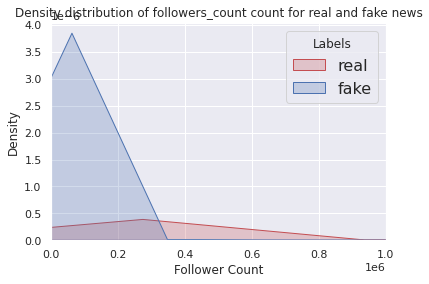

In [ ]:
generate_tweet_attr_dist(politifact_tweets_real, politifact_tweets_fake, 'followers_count', 1000000)

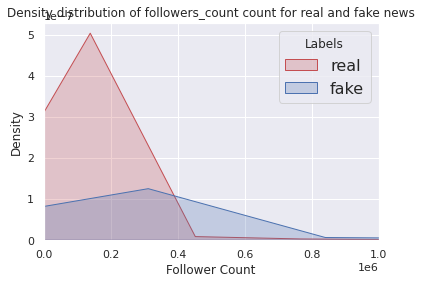

In [ ]:
generate_tweet_attr_dist(gossipcop_tweets_real, gossipcop_tweets_fake, 'followers_count', 1000000)

## (8) Retweets Count

In [ ]:
# Check number of tweets with retweets
pol_fake_rt_count = sum(x['retweet_count'] != 0 for x in politifact_tweets_fake)
pol_fake_pct = round(pol_fake_rt_count/len(politifact_tweets_fake)*100,2)

pol_real_rt_count = sum(x['retweet_count'] != 0 for x in politifact_tweets_real)
pol_real_pct = round(pol_real_rt_count/len(politifact_tweets_real)*100,2)

gc_fake_rt_count = sum(x['retweet_count'] != 0 for x in gossipcop_tweets_fake)
gc_fake_pct = round(gc_fake_rt_count/len(gossipcop_tweets_fake)*100,2)

gc_real_rt_count = sum(x['retweet_count'] != 0 for x in gossipcop_tweets_real)
gc_real_pct = round(gc_real_rt_count/len(gossipcop_tweets_real)*100,2)

print(f"Retweets for Poltifact [fake]: {pol_fake_pct}% ,{pol_fake_rt_count,len(politifact_tweets_fake)}")
print(f"Retweets for Poltifact [real]: {pol_real_pct}% ,{pol_real_rt_count,len(politifact_tweets_real)}")
print(f"Retweets for Gossipcop [fake]: {gc_fake_pct}% ,{gc_fake_rt_count,len(gossipcop_tweets_fake)}")
print(f"Retweets for Gossipcop [real]: {gc_real_pct}% ,{gc_real_rt_count,len(gossipcop_tweets_real)}")

Retweets for Poltifact [fake]: 12.43% ,(13879, 111672)
Retweets for Poltifact [real]: 17.48% ,(49746, 284634)
Retweets for Gossipcop [fake]: 11.75% ,(49846, 424384)
Retweets for Gossipcop [real]: 3.41% ,(24153, 707340)


In [ ]:
# Remove those without retweets
politifact_retweets_real = list(filter(lambda x: x['label'] =='real' and x['retweet_count'] != 0, pf_tweets))
politifact_retweets_fake = list(filter(lambda x: x['label'] =='fake'and x['retweet_count'] != 0, pf_tweets))
gossipcop_retweets_real = list(filter(lambda x: x['label'] =='real'and x['retweet_count'] != 0, gc_tweets))
gossipcop_retweets_fake = list(filter(lambda x: x['label'] =='fake'and x['retweet_count'] != 0, gc_tweets))

In [ ]:
# Find max values
print(f"Poltifact MAX retweets [fake]: {max(x['retweet_count'] for x in politifact_retweets_fake)}")
print(f"Poltifact MAX retweets [real]: {max(x['retweet_count'] for x in politifact_retweets_real)}")
print(f"Gossipcop MAX retweets [fake]: {max(x['retweet_count'] for x in gossipcop_retweets_fake)}")
print(f"Gossipcop MAX retweets [real]: {max(x['retweet_count'] for x in gossipcop_retweets_real)}")

Poltifact MAX retweets [fake]: 11129
Poltifact MAX retweets [real]: 14337
Gossipcop MAX retweets [fake]: 50772
Gossipcop MAX retweets [real]: 9444


In [ ]:
sns.boxplot(x='label', y='retweet_count', notch = True,
            data=pf_tweets_df, showfliers=False).set(title='Sentiment Score by Label')
#modify axis labels
plt.xlabel('Label')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)

In [ ]:
def generate_retweets_dist(tweet_list_real, tweet_list_fake, limit):
  tweets_real = list(map(lambda x: x['retweet_count'], tweet_list_real))
  tweets_fake = list(map(lambda x: x['retweet_count'], tweet_list_fake))

  labels = ['fake','real']

  tweets_real_countlimit = list(filter(lambda x: x <limit, tweets_real))
  tweets_fake_countlimit = list(filter(lambda x: x <limit, tweets_fake))

  sns.set(style="darkgrid")
  fig = sns.kdeplot(tweets_real_countlimit, label = 'real', shade=True, color='r')
  fig = sns.kdeplot(tweets_fake_countlimit, label = 'fake', shade=True, color='b')

  plt.legend(prop={'size': 16}, title = 'Labels')
  plt.title('Density distribution of retweet count for real and fake news')
  plt.xlabel('Retweet Count')
  plt.ylabel('Density')
  plt.show()

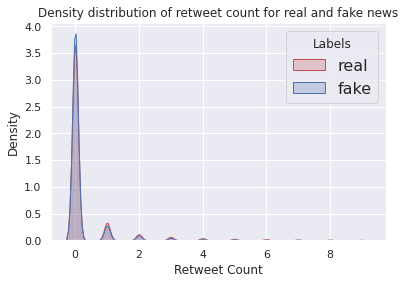

In [ ]:
generate_retweets_dist(politifact_tweets_real,politifact_tweets_fake,10)

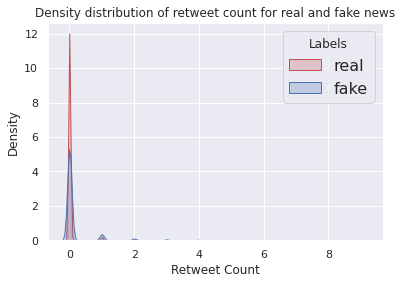

In [ ]:
generate_retweets_dist(gossipcop_tweets_real, gossipcop_tweets_fake,10)